# Multiple Regression Analysis

"It is pointless to do with more what can be done with less." ~ William of Ockham



## Definition:
Linear regression tries to fit a line through a given set of points, choosing the best fit. The best fit is the line that minimizes the summed squared difference between the value dictated by the line for a certain value of x and its corresponding y values. Formally, machine learning indicates the correct expression for a linear regression as follows:

$$Y_i = \beta X_i + \beta_0$$

Here, again, X is a matrix of the predictors, β is a matrix of coefficients, and $ \beta_0 $ is a constant value called the **bias**

## Assumptions of a Multiple Regression Model

## Benefits
- It's easy to explain how it works to yourself, to the management, or to anyone
- It's flexible in respect of your data problem, since it can handle numeric and probability estimates, ranking, and classification up to a large number of classes
- It's fast to train, no matter what the amount of data you have to process
- It's fast and easy to implement in any production environment
- It's scalable to real-time response toward users

## Calculation Steps

## Input Values

## Output Values

## Interpretation of the Output (how to determine significance)

### Regression Parameters

### Residual Standard Errors
**regression residual:** $e_i = Y_i - \hat{Y}$

**residual sum of squares:** $\displaystyle\sum_{i = 1}^n (Y_i - \hat{Y})^2$
* Other Names
    * Sum of Squared Residuals for the Sample
    * SSE
    
**residual degrees of freedom:** $n - p$
* p: # of regression parameters
* aka - error degrees of freedom

## The Value of the Method

### When to use it

### How is it different from other methods


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [10]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [12]:
#OLS is a simple model but not the simplest, using the mean is simpler.
# we can estimate or predict the value of a home as the mean.
mean_expected_value = dataset.target.mean()
mean_expected_value

22.532806324110677

In [13]:
# Calculate the error for each value in y, target
Squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
SSE = np.sum(Squared_errors)
print ('Sum of Squared Errors (SSE): %01.f' % SSE)

Sum of Squared Errors (SSE): 42716


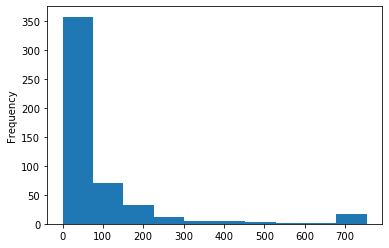

In [15]:
# histogram of the errors shows how frequent certain errors are in respect of their values.
# Most errors are around zero (there is a high density around that value).
# In most cases the mean is a good approximation, (zero error) 
# some errors are really very far from the zero and they can attain considerable values
# (errors are squared, the effect is emphasized). 
density_plot = Squared_errors.plot(kind='hist')

In [16]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In statistics, there is a measure that helps to measure how (in the sense of how much and in what direction) two variables relate to each other: correlation.

In correlation, a few steps are to be considered. First, your variables have to be **standardized** (or your result won't be a correlation but a covariation, a measure of association that is affected by the scale of the variables you are working with)

The formula for standardizing a variable:

$$ x = \frac{ x - \bar{x}}{\sigma x} $$

In [17]:
# This can be achieved in Python using a simple function:
def standardize(x):
    return ((x-np.mean(x))/np.std(x))

In [21]:
# This can also be done using the preprocessing module from sklearn
from sklearn import preprocessing
#dataset[['x']] = preprocessing.scale(model_data[['X']].astype('float64'))

## Correlation

We have a variable that we know should change with our target and we just need to measure it and extend our initial formula based on constant values with something else.

In statistics, there is a measure that helps to measure how (in the sense of how much and in what direction) two variables relate to each other: correlation.

In correlation, a few steps are to be considered. First, your variables have to be standardized (or your result won't be a correlation but a covariation, a measure of association that is affected by the scale of the variables you are working with).

Pearson's correlation is really covariance calculated on standardized variables, so we define the correlation function as a wrapper of both the covariance and standardize ones (you can find all these functions ready to be imported from Scipy; we are actually recreating them here just to help you understand how they work):

In [22]:
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) \
        /(observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2),bias)

from scipy.stats.stats import pearsonr
print ('Our correlation estimation: %0.5f' % (correlation(dataset['RM'], dataset['target'])))
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0])

Our correlation estimation: 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


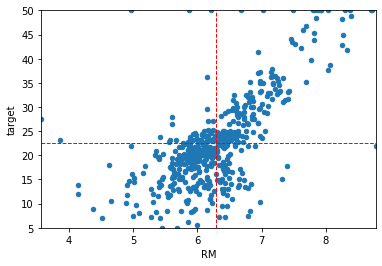

In [26]:
# Scatterplot
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target',xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--' , color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)

## Regression with Statsmodels

Statsmodels is a package designed with statistical analysis in mind; therefore, its function offers quite a rich output of statistical checks and information. Scalability is not an issue for the package; therefore, it is really a good starting point for learning, but is certainly not the optimal solution if you have to crunch quite large datasets (or even big data) because of its optimization algorithm.

There are two different methods (two modules) to work out a linear regression with Statsmodels:
- **statsmodels.api**: This works with distinct predictor and answer variables and requires you to define any transformation of the variables on the predictor variable, including adding the intercept
- **statsmodels.formula.api**: This works in a similar way to R, allowing you to specify a functional form (the formula of the summation of the predictors)

In [27]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

In [29]:
linear_regression = sm.OLS(y,X)

In [30]:
fitted_model = linear_regression.fit()

In [31]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 19 Mar 2021   Prob (F-statistic):           2.49e-74
Time:                        20:34:40   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Output

The first table is divided into two columns. The first one contains a description of the fitted model:

**Dep. Variable**: It just reminds you what the target variable was

**Model**: Another reminder of the model that you have fitted, the OLS is ordinary least squares, another way to refer to linear regression

**Method**: The parameters fitting method (in this case least squares, the classical computation method)

**No. Observations**: The number of observations that have been used

**DF Residuals**: The degrees of freedom of the residuals, which is the number of observations minus the number of parameters

**DF Model**: The number of estimated parameters in the model (excluding the constant term from the count)

The second table gives a more interesting picture, focusing how good the fit of the linear regression model is and pointing out any possible problems with the model:

**R-squared**: This is the coefficient of determination, a measure of how well the regression does with respect to a simple mean by providing you with a percentage of the unexplained variance of a mean as a predictor that actually your model was able to explain.

**Adj. R-squared**: This is the coefficient of determination adjusted based on the number of parameters in a model and the number of observations that helped build it.

**F-statistic**: This is a measure telling you if, from a statistical point of view, all your coefficients, apart from the bias and taken together, are different from zero. In simple words, it tells you if your regression is really better than a simple average.

**Prob (F-statistic)**: This is the probability that you got that F-statistic just by lucky chance due to the observations that you have used (such a probability is actually called the p-value of F-statistic). If it is low enough you can be confident that your regression is really better than a simple mean. Usually in statistics and science a test probability has to be equal or lower than 0.05 (a conventional criterion of statistical significance) for having such a confidence.

**AIC**: This is the Akaike Information Criterion. AIC is a score that evaluates the model based on the number of observations and the complexity of the model itself. The lesser the AIC score, the better. It is very useful for comparing different models and for statistical variable selection.

**BIC**: This is the Bayesian Information Criterion. It works as AIC, but it presents a higher penalty for models with more parameters.

The second output table informs us about the coefficients and provides us with a series of tests. These tests can make us confident that we have not been fooled by a few extreme observations in the foundations of our analysis or by some other problem:

**coef**: The estimated coefficient

**std err**: The standard error of the estimate of the coefficient; the larger it is, the more uncertain the estimation of the coefficient

**t**: The t-statistic value, a measure indicating whether the coefficient true value is different from zero

**P > |t|**: The p-value indicating the probability that the coefficient is different from zero just by chance

**[95.0% Conf. Interval]**: The lower and upper values of the coefficient, considering 95% of all the chances of having different observations and so different estimated coefficients

### Evaluating the fitted values
 
The last table deals with an analysis of the residuals of the regression. The residuals are the difference between the target values and the predicted fitted values:

**Skewness**: This is a measure of the symmetry of the residuals around the mean. For symmetric distributed residuals, the value should be around zero. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A bell-shaped distribution has a measure of 3. A lower value points to a too flat distribution; a positive one has too great a peak.

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: This is the Omnibus statistic turned into a probability.

**Jarque-Bera**: This is another test of skewness and kurtosis.

**Prob (JB)**: This is the JB statistic turned into a probability.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals (relevant during analysis of time-based data).

**Cond. No**: This is a test for multicollinearity.

A close analysis of residuals is quite relevant in statistical practice since it can highlight the presence of serious problems with regression analysis. In particular, it is important to keep an eye out for any of these three problems showing up:

- Values too far from the average. Large standardized residuals hint at a serious difficulty when modeling such observations. Also, in the process of learning these values, the regression coefficients may have been distorted.
- Different variance in respect of the value of the predictor. If the linear regression is an average conditioned on the predictor, dishomogeneous variance points out that the regression is not working properly when the predictor has certain values.
- Strange shapes in the cloud of residual points may indicate that you need a more complex model for the data you are analyzing.

In [32]:
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

In [33]:
residuals = dataset['target']-fitted_values
normalized_residuals = standardize(residuals)

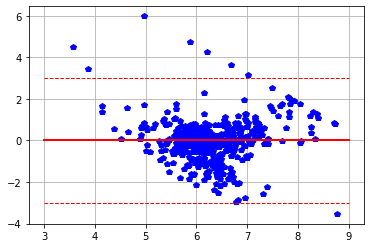

In [35]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals,'bp')
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color='red', linewidth=1)
plt.grid();

The resulting scatterplot indicates that the residuals show some of the problems we previously indicated as a warning that something is not going well with your regression analysis. First, there are a few points lying outside the band delimited by the two dotted lines at normalized residual values −3 and +3 (a range that should hypothetically cover 99.7% of values if the residuals have a normal distribution). These are surely influential points with large errors and they can actually make the entire linear regression under-perform. 

Then, the cloud of points is not at all randomly scattered, showing different variances at different values of the predictor variable (the abscissa axis) and you can spot unexpected patterns (points in a straight line, or the core points placed in a kind of U shape).

## Correlation is not causation

Actually, seeing a correlation between your predictor and your target variable, and managing to model it successfully using a linear regression, doesn't really mean that there is a causal relation between the two (though your regression may work very well, and even optimally).

We will tell you about six different reasons, and offer a cautionary word to help you handle such predictors without difficulty:

**Direct causation**: x causes y; for instance, in the real estate business the value is directly proportional to the size of the house in square meters.

**Reciprocal effects**: x causes y but it is also influenced by y. This is quite typical of many macro-economic dynamics where the effect of a policy augments or diminishes its effects. As an example in real estate, high crime rates in an area can lower its prices but lower prices mean that the area could quickly become even more degraded and dangerous.

**Spurious causation**: This happens when the real cause is actually z, which causes both x and y; consequently it is just a fallacious illusion that x implies y because it is z behind the scenes. For instance, the presence of expensive art shops and galleries may seem to correlate with house prices; in reality, both are determined by the presence of affluent residents.

**Indirect causation**: x in reality is not causing y but it is causing something else, which then causes y. A good municipality investing in infrastructures after higher taxes can indirectly affect house prices because the area becomes more comfortable to live in, thus attracting more demand. Higher taxes, and thus more investments, indirectly affect house prices.

**Conditional effect**: x causes y in respect of the values of another variable z; for instance, when z has certain values x is not influencing y but, when z takes particular values, the x starts impacting y. We also call this situation interaction. For instance the presence of schools in an area can become an attractor when the crime rate is low, so it affects house prices only when there is little criminality.

**Random effect**: Any recorded correlation between x and y has been due to a lucky sampling selection; in reality there is no relationship with y at all.

